<a href="https://colab.research.google.com/github/darthfelipe21/Data_Scientist/blob/main/Data_Analyst_Fast_food_chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analyst Associate Practical Exam Submission

### Background

1. Vivendo is a fast food chain in Brazil with over 200 outlets.
2. Customers often claim compensation from the company for food poisoning.
3. The legal team processes these claims. The legal team has offices in four locations.
4. The legal team wants to improve how long it takes to reply to customers and close claims.
5. The head of the legal department wants a report on how each location differs in the time it takes to close claims.

In [ ]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import Data and create Dataframe
df= pd.read_csv('food_claims_2212.csv', index_col= 'claim_id')

In [ ]:
# Print firsts rows of the dataframe
df.head()

,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
claim_id,,,,,,,
1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


In [ ]:
# Print all nulls
df.isnull().sum()

time_to_close            0
claim_amount             0
amount_paid             36
location                 0
individuals_on_claim     0
linked_cases            26
cause                    0
dtype: int64

In [ ]:
# Fill null values from amount_paid with median
df['amount_paid']= df['amount_paid'].fillna(df['amount_paid'].median())

In [ ]:
# Fill null values from linked_cases with False as boolean
df['linked_cases']= df['linked_cases'].fillna('False').astype(bool)

In [ ]:
# Print info of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time_to_close         2000 non-null   int64  
 1   claim_amount          2000 non-null   object 
 2   amount_paid           2000 non-null   float64
 3   location              2000 non-null   object 
 4   individuals_on_claim  2000 non-null   int64  
 5   linked_cases          2000 non-null   bool   
 6   cause                 2000 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 111.3+ KB


In [ ]:
# Remove some features of column claim_amount
df['claim_amount']= df['claim_amount'].str.replace('R$','', regex=False).astype(float)

In [ ]:
# Checking all nulls again
df.isnull().sum()

time_to_close           0
claim_amount            0
amount_paid             0
location                0
individuals_on_claim    0
linked_cases            0
cause                   0
dtype: int64

In [ ]:
# Print firsts rows of the dataframe
df.head()

,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
claim_id,,,,,,,
1,317,74474.55,51231.37,RECIFE,15,False,unknown
2,195,52137.83,42111.30,FORTALEZA,12,True,unknown
3,183,24447.20,23986.30,SAO LUIS,10,True,meat
4,186,29006.28,27942.72,FORTALEZA,11,False,meat
5,138,19520.60,16251.06,RECIFE,11,False,vegetable


In [ ]:
# Checking the values from individuals on claim
df.individuals_on_claim.value_counts().sort_index()

1      57
2     156
3     150
4     142
5     137
6     123
7     152
8     154
9     142
10    135
11    137
12    156
13    139
14    121
15     99
Name: individuals_on_claim, dtype: int64

In [ ]:
# Printing how many values are in each column
df.nunique()

time_to_close            256
claim_amount            2000
amount_paid             1964
location                   4
individuals_on_claim      15
linked_cases               2
cause                      5
dtype: int64

In [ ]:
# Checking column of cause, if it has correctly values
df.cause.value_counts()

meat          943
unknown       713
vegetable     314
VEGETABLES     16
 Meat          14
Name: cause, dtype: int64

In [ ]:
# Changing incorrect values
df['cause']= df['cause'].replace(['VEGETABLES', ' Meat'], ['vegetable', 'meat'])

In [ ]:
# Checking how many values are in each column
df.nunique()

time_to_close            256
claim_amount            2000
amount_paid             1964
location                   4
individuals_on_claim      15
linked_cases               2
cause                      3
dtype: int64

# EDA (Exploratory Data Analisys)

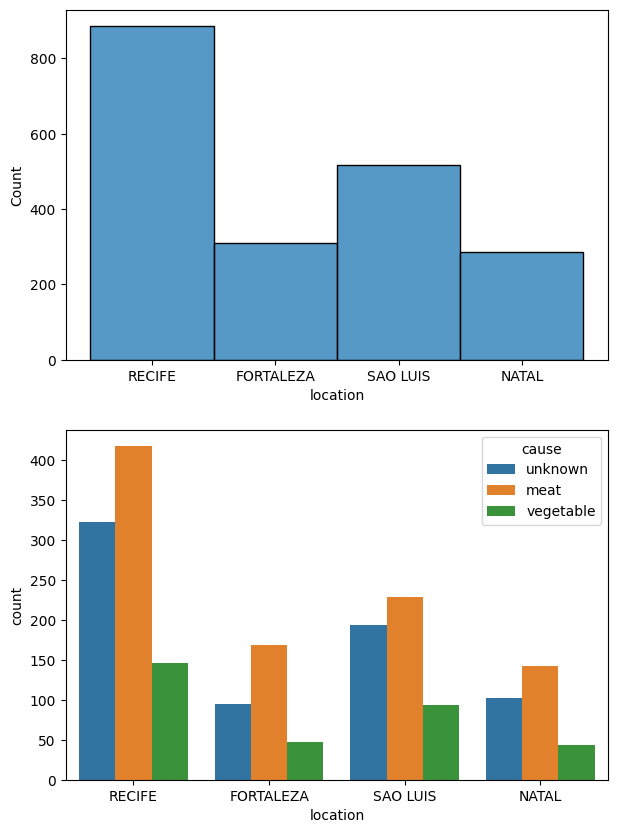

In [ ]:
# Make a Histogram and a Countplot to see which restaurant has the most complaints
fig, (ax0, ax1) = plt.subplots(nrows= 2, ncols= 1, figsize= (7,10))
sns.histplot(data= df, x= 'location', ax=ax0)
sns.countplot(data= df, x= 'location', hue= 'cause', ax= ax1)
plt.show()

As can be observed in the histogram, the location with the highest number of claims is the one located in Recife, followed by Sao Luis, Fortaleza, and Natal.

However, upon closer examination using a countplot, the majority of claims related to intoxication are due to the consumption of meat, with vegetable intake receiving the fewest complaints.

It is suggested to delve further into the surveys to determine which unknown foods could be causing intoxication, as they have a significant share in the reported claims.

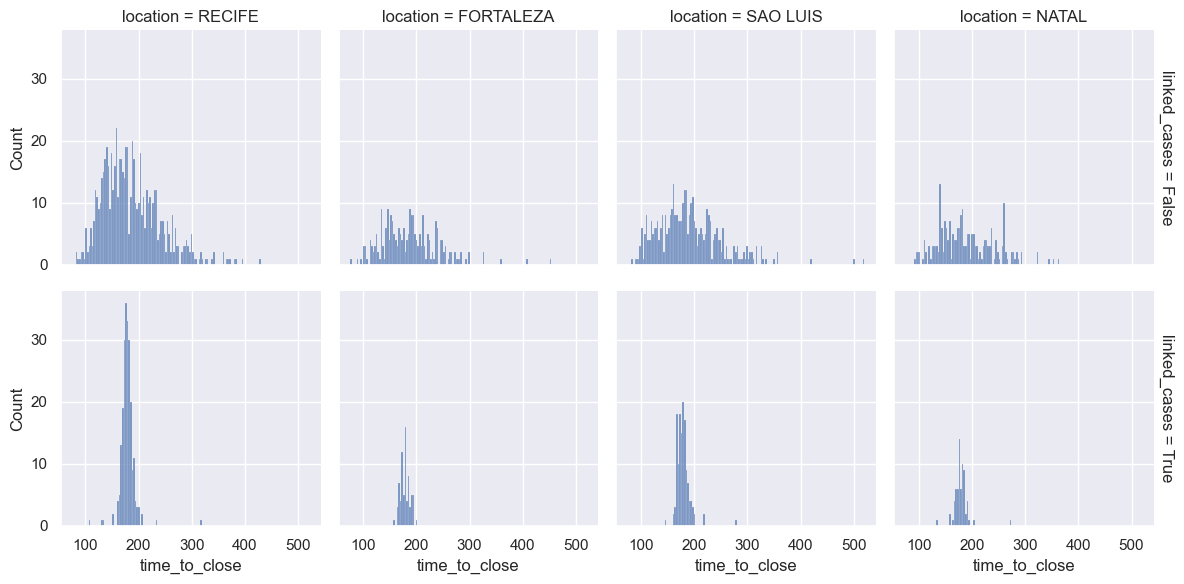

In [ ]:
# Distribution graph about time to close, location and linked cases
sns.set_theme(style="darkgrid")
sns.displot(df, x="time_to_close", col="location", row="linked_cases", binwidth=3, height=3, facet_kws=dict(margin_titles=True))
plt.show()

As evident from the data, there is a notable concentration of claim closure times between 150 and 200 days for the Recife establishment. Additionally, it's worth mentioning that there seems to be a certain relationship among the closure times for the other 3 establishments within the same time range.

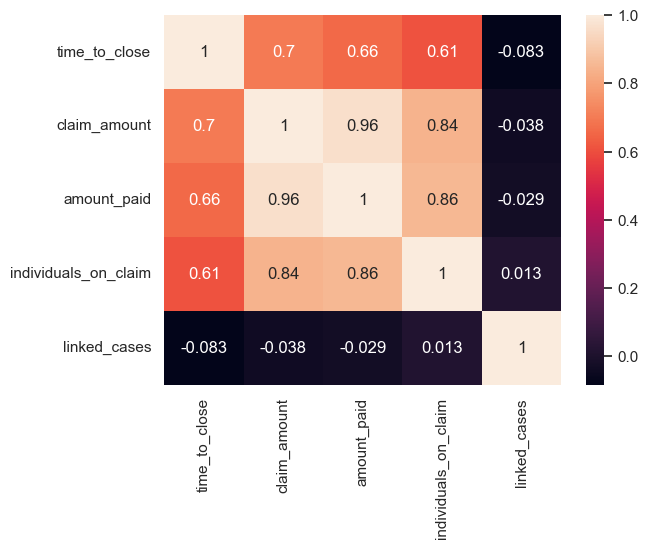

In [ ]:
# Correalation between features
sns.heatmap(df.corr(), annot= True)
plt.show()

**Claim Amount and Amount Paid:** There is a strong positive correlation (0.965) between the claim amount and the amount paid. This suggests that as the claim amount increases, the amount paid also tends to increase significantly.

**Individuals on Claim and Claim Amount:** There is a moderate positive correlation (0.844) between the number of individuals involved in the claim and the claim amount. This indicates that claims with more individuals involved tend to have higher claim amounts.

**Individuals on Claim and Amount Paid:** There is also a moderate positive correlation (0.855) between the number of individuals involved in the claim and the amount paid. This implies that claims with more individuals involved tend to receive higher payment amounts.

**Linked Cases and Amount Paid:** There is a weak negative correlation (-0.083) between the number of linked cases and the amount paid. This suggests that linked cases may be associated with slightly lower payment amounts.

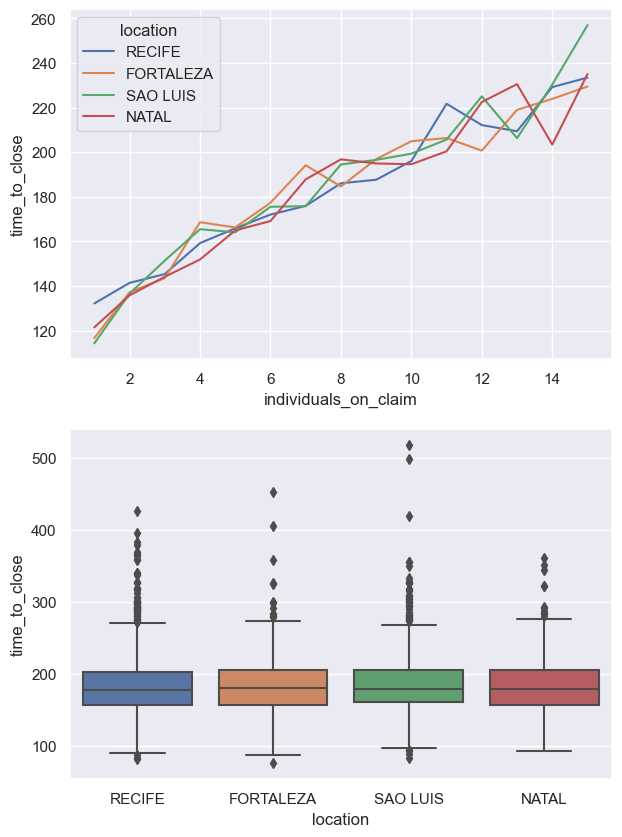

In [ ]:
# Making a lineplot and box plot to check the relationship between features and time to close claim
fig, (ax0, ax1) = plt.subplots(nrows= 2, ncols= 1, figsize= (7,10))
sns.lineplot(data= df, x= 'individuals_on_claim', y= 'time_to_close', hue= 'location', ci= None, ax= ax0)
sns.boxplot(data= df, x= 'location', y= 'time_to_close', ax= ax1)
plt.show()

In the line graph, a clear and strong relationship can be observed across all four establishments between the response time of the claim and the number of individuals involved. As the number of individuals increases, the time taken to close the claim also increases.

It is understandable that with more people involved, the investigation process may become more exhaustive to pinpoint the potential cause of the intoxication. Therefore, prioritizing claims with more than 8 individuals involved is suggested, as these cases could have an even more significant negative impact on the food chain.

By promptly focusing on and addressing larger claims, potential food safety issues can be identified and resolved more efficiently. This approach will lead to improved customer satisfaction and safeguard the reputation of the establishments.

**Furthermore, it is evident that the four establishments show similar behavior in terms of the time it takes to close each claim, irrespective of the number of individuals involved.**

The data indicates that the average number of individuals involved in each claim is approximately 8.05. This value provides valuable insights into the size or severity of the reported claims.

In [ ]:
# Describing DataFrame
df.describe()

,time_to_close,claim_amount,amount_paid,individuals_on_claim
count,2000.00000,2000.000000,2000.000000,2000.000000
mean,185.56800,27156.965235,21516.122230,8.049500
std,49.16339,16195.783099,12418.285043,4.087347
min,76.00000,1637.940000,1516.720000,1.000000
25%,158.00000,13758.952500,11106.652500,4.000000
50%,179.00000,24821.085000,20105.700000,8.000000
75%,204.00000,38581.350000,30472.895000,12.000000
max,518.00000,76106.800000,52498.750000,15.000000


Average claim closure time: The average time to close a claim is approximately 185.57 days. This information provides a general idea of the mean duration it takes to resolve claims overall.

**Variability in claim closure time:** The standard deviation of the claim closure time is approximately 49.16 days. This indicates that there is some variability in the claim closure times, suggesting that some claims may be resolved faster or slower than the average.

**Number of individuals involved:** The average number of individuals involved in each claim is approximately 8.05. This may give an indication of the size or severity of the reported claims.

**Average claim amount:** The average claim amount is approximately 27,156.97, with a standard deviation of approximately 16,195.78. This indicates that there is considerable variability in the claim amounts.

**Average amount paid:** The average amount paid per claim is approximately 21,516.12, with a standard deviation of approximately 12,418.29.

**Data distribution:** The percentiles (25%, 50%, and 75%) provide information about how the data is distributed. For example, 25% of the claims have a closure time of less than 158 days, and 75% of the claims have a closure time of less than 204 days.

## **Advice**

**Streamline Claim Closure Process:** Implement strategies to reduce the average claim closure time. This could involve optimizing internal processes, ensuring clear communication channels, and providing adequate resources to handle claims efficiently.

**Improve Consistency:** Address the variability in claim closure times by establishing standardized procedures and guidelines for handling claims. Regularly review and update these procedures to ensure uniformity across locations.

**Investigate High Impact Claims:** Give priority to claims involving multiple individuals or high claim amounts, as they may have a more significant impact on public perception and brand reputation. Swift resolution and thorough investigations are crucial for these cases.

**Data-Driven Decision Making:** Continuously analyze claim data and identify patterns or trends to make informed decisions. Use data insights to proactively address issues and implement preventive measures.

**Customer Engagement:** Engage with customers during the claims process to show responsiveness and dedication to their concerns. This can lead to higher customer satisfaction and loyalty.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam